In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("K:\DATA SCIENCE\DataSets\Admission_Predict.csv")

In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
X = df.drop(['Serial No.','Chance of Admit '],axis = 1)

In [8]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [9]:
y = df['Chance of Admit ']

In [10]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [13]:
X.shape

(400, 7)

In [14]:
X_train.shape

(320, 7)

In [15]:
X_test.shape

(80, 7)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
X_train[0]

array([-1.51394144, -1.19788803, -1.76860023, -1.87786692, -1.60716517,
       -1.17008221, -1.06458129])

In [74]:
model = Sequential()

model.add(Dense(7,activation= 'relu', input_dim = 7))
model.add(Dense(5,activation= 'relu'))
model.add(Dense(1,activation = 'linear'))

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 5)                 40        
                                                                 
 dense_22 (Dense)            (None, 1)                 6         
                                                                 
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [82]:
history = model.fit(X_train, y_train, epochs = 100,validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 11/100
8/8 [=========

In [83]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [98]:
from sklearn.metrics import r2_score, mean_absolute_error

In [85]:
print(r2_score(y_test,y_pred))

0.7284311774232165


In [99]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.05876451708376408


In [86]:
import matplotlib.pyplot as plt

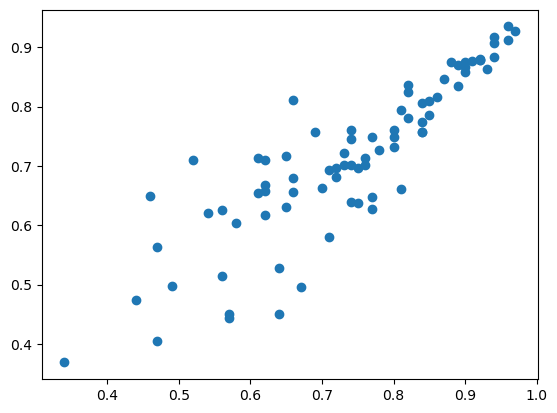

In [93]:
plt.scatter(y_test,y_pred)